In [1]:
!pip install -U langgraph

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [2]:
class MyGraphState(TypedDict):
  count: int
  msg: str

In [3]:
def counter(state: MyGraphState):
  state["count"] += 1
  state["msg"] = f"Counter function has been called {state['count']} time(s)"
  return state

In [4]:
workflow = StateGraph(MyGraphState)

In [5]:
workflow.add_node("Node1", counter)
workflow.add_node("Node2", counter)
workflow.add_node("Node3", counter)

In [6]:
workflow.add_edge(START, "Node1")
workflow.add_edge("Node1", "Node2")
workflow.add_edge("Node2", "Node3")

workflow.add_edge("Node3", END)

In [7]:
app = workflow.compile()

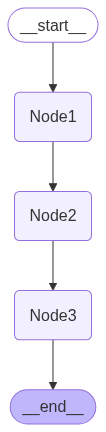

In [8]:
from IPython.display import Image, display
png = app.get_graph().draw_mermaid_png()

display(Image(png))

In [9]:
app.invoke({"count": 0, "msg":"hello"})

{'count': 3, 'msg': 'Counter function has been called 3 time(s)'}

## LangGraph 0.5.0 State Management

In [1]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv('OPENAI_API_KEY')


In [4]:
# 1. State 정의 - 그래프에서 사용할 데이터 구조
class GraphState(TypedDict):
    """그래프의 상태를 정의하는 클래스"""
    messages: Annotated[list, add_messages]  # 메시지 리스트 (자동으로 추가됨)
    user_intent: str  # 사용자 의도
    response_type: str  # 응답 타입 결정
    final_answer: str  # 최종 답변    

In [ ]:
def analyze_intent(state: GraphState) -> GraphState:
    """사용자 의도를 분석하는 함수"""
    
    messages = state['messages']
    last_message = messages[-1].content if messages else ""
    
    if "안녕" in last_message or "hello" in last_message.lower():
        intent = "greeting":
    elif "날씨" in last_message or "weather" in last_message.lower():
        intent = "weather"
    elif "시간" in last_message or "time" in last_message.lower():
        intent = "time" 
    else:
        intent = "general"
        
    return { **state, "user_intent": intent}

def determine_response_type(state: GraphState) -> GraphState:
    
    intent = state["user_intent"]
    
    if intent in ["greeting", "time"]:
        response_type = "simple" 
    elif intent == "weather":
        response_type = "api_call""1. simple graph.ipynb"
        